#Using approximate reflectance profile
by [Christensen, Burley 2015]

###The equation

$R(r)$ - reflectance profile

$r$ - distance

####Parameters

$l$ - mean free path length

$A$ - albedo

$$
R(r)=As\frac{e^{-sr/l}+e^{-sr/3l}}{8\pi r}
$$

$s$ - scaling factor

###Values for s

Perpendicular case
$$
s=1.85-A+7|A-0.8|^3
$$

Ideal diffuse transmission case
$$
s=1.9-A+3.5(A-0.8)^2
$$

Diffuse mean free path as parameter
$$
s=3.5+100(A-0.33)^4
$$

## CDF

$$
cdf(r)=1-\frac{1}{4}e^{-r/d}-\frac{3}{4}e^{-r/(3d)}
$$

$d = \frac{l}{s}$ or $d = \frac{l_d}{s}$

$l_d = 1/\sigma_{tr}$ - diffuse mean free path

$\sigma_{tr}$ - reduced extiction coefficient

In [1]:
%matplotlib inline
import numpy as np
from easyplot import EasyPlot

In [2]:
def ReflectanceProfile(A, s, r, l=1):
    return A * s * (np.exp(-s*r/l) + np.exp(-s*r/(3*l)) / (r+1))

In [3]:
def scaling_p(A):
    return 1.85 - A + 7 * np.abs(A-0.8)**3

def scaling_i(A):
    return 1.9 - A + 3.5 * (A - 0.8)**2

def scaling_d(A):
    return 3.5 + 100 * (A - 0.33)**4

In [4]:
allowed_linestyles = ['-','--','-.',':']
nlinestyles = len(allowed_linestyles)

x = np.linspace(0.001,8,50)
albedos = np.arange(0.1, 1, 0.1)
nalb = len(albedos)

ysp, ysi, ysd, labels, linestyles = {}, {}, {}, {}, {}
colors = []

for idx, val in enumerate(albedos):
    key = "A" + str(val)
    
    rgb = np.random.randint(0, 255, 3)
    color = "#{:02x}{:02x}{:02x}".format(*rgb)
    
    ysp[key] = ReflectanceProfile(val, scaling_p(val), x)# / np.pi / 8
    ysi[key] = ReflectanceProfile(val, scaling_i(val), x)# / np.pi / 8
    ysd[key] = ReflectanceProfile(val, scaling_d(val), x)# / np.pi / 8
    labels[key] = "$A={:.1f}$".format(val)
    linestyles[key] = allowed_linestyles[idx%nlinestyles]
    colors.append(color)

/home/toster/.local/lib64/python3.4/site-packages/easyplot/easyplot.py:228: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x_loop = x[key]
/usr/lib64/python3.4/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


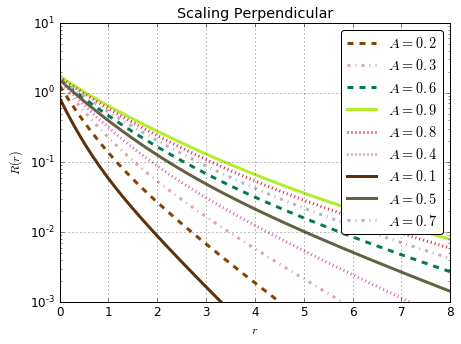

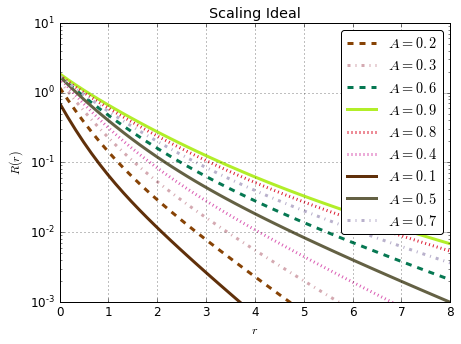

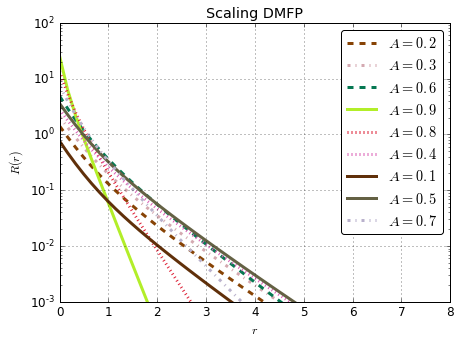

In [5]:
plotp = EasyPlot(xlabel="$r$", ylabel="$R(r)$", fontsize=12, colorcycle=colors, figsize=(7,5), grid='on',
                title="Scaling Perpendicular", ms=10, linewidth=3)
plotp.iter_plot(x, ysp, linestyle=linestyles, label=labels, showlegend=True)
ax = plotp.get_axes()
ax.set_yscale('log')
ax.set_ybound(lower=0.001)

ploti = EasyPlot(xlabel="$r$", ylabel="$R(r)$", fontsize=12, colorcycle=colors, figsize=(7,5), grid='on',
                title="Scaling Ideal", ms=10, linewidth=3)
ploti.iter_plot(x, ysi, linestyle=linestyles, label=labels, showlegend=True)
ai = ploti.get_axes()
ai.set_yscale('log')
ai.set_ybound(lower=0.001)

plotd = EasyPlot(xlabel="$r$", ylabel="$R(r)$", fontsize=12, colorcycle=colors, figsize=(7,5), grid='on',
                title="Scaling DMFP", ms=10, linewidth=3)
plotd.iter_plot(x, ysd, linestyle=linestyles, label=labels, showlegend=True)
ad = plotd.get_axes()
ad.set_yscale('log')
ad.set_ybound(lower=0.001)

/home/toster/.local/lib64/python3.4/site-packages/easyplot/easyplot.py:228: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x_loop = x[key]
/usr/lib64/python3.4/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


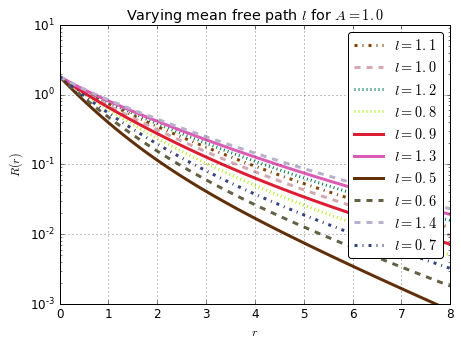

In [6]:
ls = np.arange(0.5, 1.5, 0.1)

Al = 1
ysl = {}

for idx, val in enumerate(ls):
    key = "l" + str(val)
    
    rgb = np.random.randint(0, 255, 3)
    color = "#{:02x}{:02x}{:02x}".format(*rgb)
    
    ysl[key] = ReflectanceProfile(Al, scaling_p(Al), x, val)
    labels[key] = "$l={:.1f}$".format(val)
    linestyles[key] = allowed_linestyles[idx%nlinestyles]
    colors.append(color)
    
plotl = EasyPlot(xlabel="$r$", ylabel="$R(r)$", fontsize=12, colorcycle=colors, figsize=(7,5), grid='on',
                title="Varying mean free path $l$ for $A={:.1f}$".format(Al), ms=10, linewidth=3)
plotl.iter_plot(x, ysl, linestyle=linestyles, label=labels, showlegend=True)
ax = plotl.get_axes()
ax.set_yscale('log')
ax.set_ybound(lower=0.001)

#Fitting

Remove the constants
$$
R(r)=\frac{e^{-r/A}+e^{-r/3A}}{r}
$$

The maximum possible value of $R(r)$ has to meet requirement:
$R(r=0,A=1)=1$

/usr/lib64/python3.4/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/toster/.local/lib64/python3.4/site-packages/easyplot/easyplot.py:228: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x_loop = x[key]


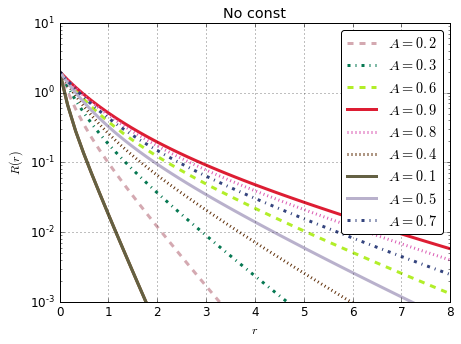

In [7]:
def myR(A, r):
    return (np.exp(-r/A) + np.exp(-r/A/3))/(1+r)

albedos = np.arange(0.1, 1, 0.1)

ysm = {}
for idx, val in enumerate(albedos):
    key = "A" + str(val)
    ysm[key] = myR(val, x)

plotm = EasyPlot(x, ysm["A0.1"], xlabel="$r$", ylabel="$R(r)$", fontsize=12, colorcycle=colors, figsize=(7,5), grid='on',
                title="No const", ms=10, linewidth=3)
plotm.iter_plot(x, ysm, linestyle=linestyles, label=labels, showlegend=True)
am = plotm.get_axes()
am.set_yscale('log')
am.set_ybound(lower=0.001)

In [8]:
from scipy.optimize import newton

func = lambda x: x * myR(1, 0) - 1
K = newton(func, 0.6)

print ("Relectance profile normalization coefficient =", K)

Relectance profile normalization coefficient = 0.5


/home/toster/.local/lib64/python3.4/site-packages/easyplot/easyplot.py:228: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x_loop = x[key]
/usr/lib64/python3.4/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


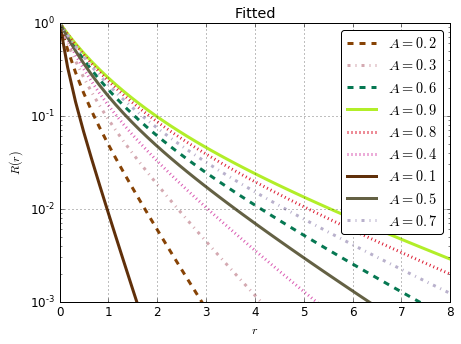

In [9]:
yspn = {}
for idx, val in enumerate(albedos):
    key = "A" + str(val)
    yspn[key] = K * myR(val, x)

plotp = EasyPlot(xlabel="$r$", ylabel="$R(r)$", fontsize=12, colorcycle=colors, figsize=(7,5), grid='on',
                title="Fitted", ms=10, linewidth=3)
plotp.iter_plot(x, yspn, linestyle=linestyles, label=labels, showlegend=True)
ax = plotp.get_axes()
ax.set_yscale('log')
ax.set_ybound(lower=0.001)

#Maximum radius function seek

$\delta$ - threshold

$R(F(A))=\delta$

$$
\delta=\frac{e^{-r/A}+e^{-r/3A}}{8\pi r}
$$

/usr/lib64/python3.4/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from IPython.kernel.zmq import kernelapp as app
/usr/lib64/python3.4/site-packages/scipy/optimize/zeros.py:173: RuntimeWarning: Tolerance of 0.00010099999999999866 reached
  warnings.warn(msg, RuntimeWarning)
/usr/lib64/python3.4/site-packages/IPython/kernel/__main__.py:18: RuntimeWarning: divide by zero encountered in power


[ 5.57936707  0.75364915]


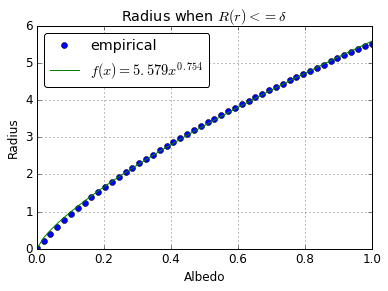

In [10]:
albedos = np.linspace(0, 1, 50)
delta = 0.025

rads = []
for A in albedos:
    tofind = lambda r, a=A: myR(a,r) - delta
    x0=0.01
    maxrad = newton(tofind, x0)
    rads.append(maxrad)

rplot = EasyPlot(albedos, rads, 'bo', title="Radius when $R(r)<=\delta$",
                 label="empirical", ylabel="Radius", xlabel="Albedo",
                 showlegend=True, grid='on',)

from scipy.optimize import curve_fit

def fitFunc(x, a, b):
    return a * x**b

fitParams, fitCovariances = curve_fit(fitFunc, albedos, rads)

rplot.add_plot(albedos,fitFunc(albedos, *fitParams), 'g', label="$f(x)={:.3f}x^{{{:.3f}}}$".format(*fitParams))

print (fitParams)

# Derivative

$$
\frac{\partial R_{r=1}(A)}{\partial A}=e^{-1/A}+e^{-1/3A}=\frac{e^{-1/A}}{A^2}+\frac{e^{-1/3A}}{3A^2}
$$

/home/toster/.local/lib64/python3.4/site-packages/easyplot/easyplot.py:228: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x_loop = x[key]
/usr/lib64/python3.4/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


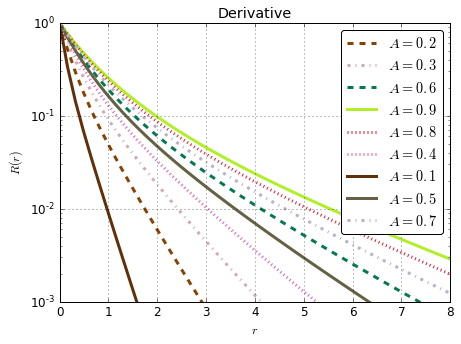

In [11]:
def derivR(A):
    return np.exp(-1/A)/A**2 + np.exp(-1/3/A)/3/A**2

albedos = np.arange(0.1, 1, 0.1)

yspd = {}
for idx, val in enumerate(albedos):
    key = "A" + str(val)
    yspd[key] = K * myR(val, x)

plotd = EasyPlot(xlabel="$r$", ylabel="$R(r)$", fontsize=12, colorcycle=colors, figsize=(7,5), grid='on',
                title="Derivative", ms=10, linewidth=3)
plotd.iter_plot(x, yspd, linestyle=linestyles, label=labels, showlegend=True)
ad = plotd.get_axes()
ad.set_yscale('log')
ad.set_ybound(lower=0.001)

##Sampling

/home/toster/.local/lib64/python3.4/site-packages/easyplot/easyplot.py:228: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x_loop = x[key]
/usr/lib64/python3.4/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


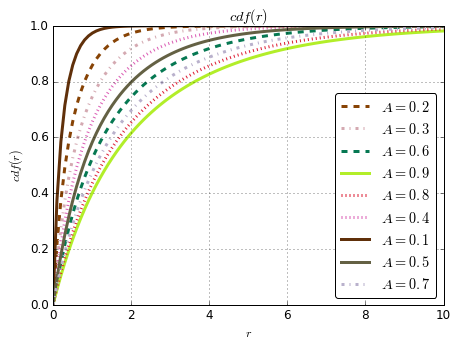

In [12]:
# d = A
def cdf(r, d=0.5):
    return 1-0.25*np.exp(-r/d)-0.75*np.exp(-r/d/3)

rx = np.linspace(0,10,100)
cdfy = {}
for idx, val in enumerate(albedos):
    key = "A" + str(val)
    cdfy[key] = cdf(rx, val)


plotr = EasyPlot(xlabel="$r$", ylabel="$cdf(r)$", fontsize=12, colorcycle=colors, figsize=(7,5), grid='on',
                title="$cdf(r)$", ms=10, linewidth=3)
plotr.iter_plot(rx, cdfy, linestyle=linestyles, label=labels, showlegend=True)
ac = plotr.get_axes()
#ac.set_yscale('log')

In [13]:
def sample_square(sx, sy):
    theta = 2. * np.pi * sx

    v2 = sy**2
    x = v2 * np.cos(theta)
    y = v2 * np.sin(theta)
    z = sy
    return (x,y,z)

def sample_root(sx, sy, A):
    theta = 2. * np.pi * sx

    x = sy * np.cos(theta)
    y = sy * np.sin(theta)
    z = np.sqrt(-2. * A * np.log(1. - sy * (1. - np.exp(-0.5/A))))
    return (x,y,z)

def get_max_rad(A):
    return 9.05840267 * A**0.80830526

def sample_R(sx, sy, A):
    theta = 2. * np.pi * sx
    x = sy * np.cos(theta)
    y = sy * np.sin(theta)
    r = get_max_rad(A)
    z = cdf(sy*r, A)
    return (x,y,z)

def sampleOnSphere(sx, sy):
    theta = 2. * np.pi * sx
    s = 2. * sy - 1
    s2 = np.sqrt(1. - s*s)
    return ((s2 * np.cos(theta), s2 * np.sin(theta), s))

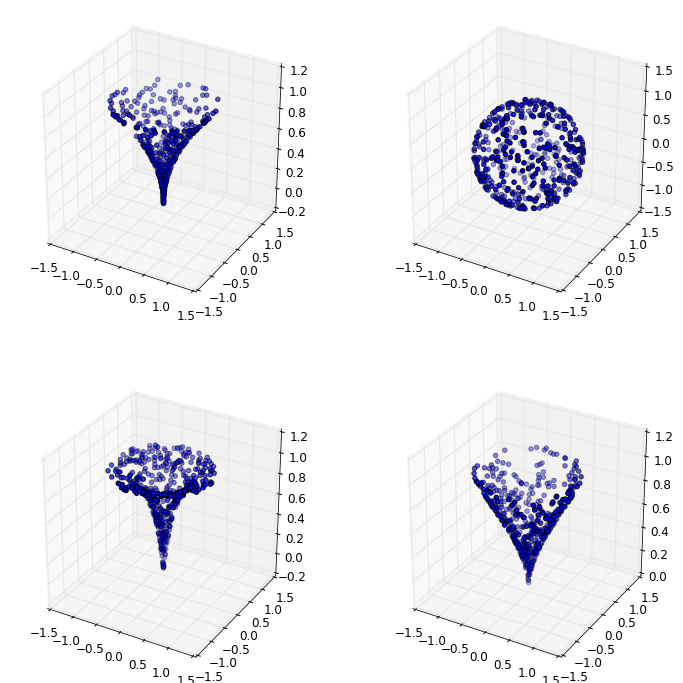

In [14]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(12)
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

def scatterall(funcs, axeses):
    for func, ax in zip(funcs, axeses):
        points = np.array([func(*np.random.rand(2)) for x in range(500)])
        tmp = ax.scatter(*(points.transpose()))

A = 0.5
funcs = (sample_square, sampleOnSphere, lambda sx, sy: sample_R(sx, sy, A), lambda sx, sy: sample_root(sx, sy, A))
scatterall(funcs, (ax1, ax2, ax3, ax4))

## Scattering coefficient

$ A = \frac{1}{\sigma_{tr}}$

$\sigma_{tr} = \sqrt{\frac{\sigma_a}{D}}$, therefore

$D=\frac{\sigma_a^2}{\sigma_{tr}^2}$ и $\sigma_{tr} = \frac{1}{A}$ дают $D=(\sigma_a A)^2$

$D = \frac{\sigma_t '+\sigma_a}{3\sigma_t ' ^2}$ дает
Квадратное уравнение :
$$-D\sigma_t'^2+\frac{1}{3}\sigma_t'+\frac{1}{3}\sigma_a=0$$

Решаем его.

Из
$\sigma_t' = \sigma_s ' + \sigma_a$
полуаем
$\sigma_s' = \sigma_t ' - \sigma_a$

Далее
$\sigma_s' = \sigma_s (1-g)$

$\sigma_s = \frac{\sigma_s'}{1-g}$

/usr/lib64/python3.4/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


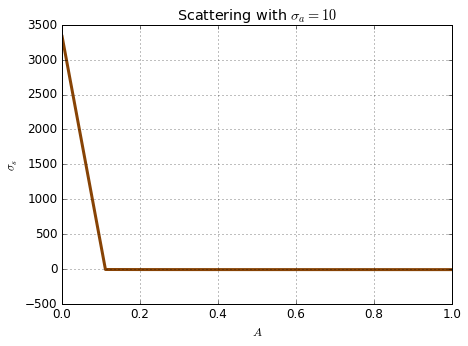

In [15]:
def solve_square(a, b, c):
    D = b**2 - 4*a*c
    x1, x2 = None, None
    if D > 0:
        x1 = (-b + np.sqrt(D))/(2*a)
        x2 = (-b - np.sqrt(D))/(2*a)
    elif D == 0:
        x1 = x2 = -b/(2*a)
    
    return x1, x2

#Find sigma_s

#The known values
A = 0.5
sigma_a = 10
g = 0

def get_scattering_coeff(A, sigma_a, g = 0):
    D = (sigma_a * A)**2

    pcoeffs = [-D, 1/3, sigma_a/3]
    sigma_t = np.roots(pcoeffs)[0]

    return (sigma_t - sigma_a) / (1-g)

#yss = {}
#for idx, val in enumerate(albedos):
#    key = "A" + str(val)
#    yss[key] = get_scattering_coeff(val, sigma_a, g)

x_albedos = np.linspace(0.001, 1, 10)
absorbs = np.arange(0.1, 10, 0.5)

y_scatterc = np.array([get_scattering_coeff(alb, sigma_a) for alb in x_albedos])

#print x_albedos, y_scatterc
plots = EasyPlot(x_albedos, y_scatterc, xlabel="$A$", ylabel="$\sigma_s$", fontsize=12, colorcycle=colors, figsize=(7,5), grid='on',
               title="Scattering with $\sigma_a={}$".format(sigma_a), ms=10, linewidth=3)
#plots.iter_plot(albedos, yspn, linestyle=linestyles, label=labels, showlegend=True)
#axs = plots.get_axes()
#axs.set_yscale('log')
#axs.set_ybound(lower=0.001)